In [1]:
##Testing scoring rule vs energy kernel
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import torch
import sigkernel

In [374]:
def energy_score(ensemble_forecast, observation):
    """
    Compute the Energy Score for an ensemble forecast and observation.

    Args:
        ensemble_forecast (torch.Tensor): Forecast ensemble of shape (ensemble_size, sequence_length, feature_dim).
        observation (torch.Tensor): Observation tensor of shape (1, sequence_length, feature_dim).

    Returns:
        torch.Tensor: The Energy Score for the ensemble.
    """
    m = ensemble_forecast.size(0)

    # Compute the average distance between ensemble members and the observation
    obs_diff = torch.norm(ensemble_forecast - observation, dim=(1, 2))  # Norm over sequence and features
    term1 = obs_diff.mean()

    # Compute the average pairwise distance within the ensemble
    pairwise_diffs = torch.norm(ensemble_forecast.unsqueeze(0) - ensemble_forecast.unsqueeze(1), dim=(2, 3))
    term2 = pairwise_diffs.mean()

    # Calculate the energy score
    energy_score = term1 - 0.5 * term2

    return energy_score


In [2]:
lossvalues = np.asarray([-2.5971, -3.0381, -2.6879, -3.5474, -4.6140, -20.8996, -3.0812, -3.3020, -3.3220, -3.6254,
 -3.5564, -4.1265, -5.4766, -3.5346, -4.3274, -4.6061, -4.1711, -4.8773, -5.1553, -6.0150,
 -6.0394, -7.3332, -6.7185, -7.9276, -7.8193, -8.7608, -9.6651, -13.1131, -12.6403, -18.4103,
 -9.6589, -43.7395, -48.5960, -7.8812, -6.7937, -8.4391, -10.5377, -9.8704, -13.7418, -12.7497,
 -12.8446, -11.6216, -13.0628, -12.6657, -12.2509, -13.6254, -12.9986, -14.4159, -15.8728, -12.6810])
lossvaluesgelu = np.asarray([-2.3686, -2.6464, -3.5548, -4.5712, -2.9648, -3.2281, -3.8246, -5.1835, -4.8858, -6.5621,
 -7.6411, -10.6290, -9.4415, -9.8998, -14.1058, -10.8567, -11.5722, -12.0658, -7.5742, -4.3945,
 -7.2965, -6.5300, -7.7862, -8.7053, -0.9906, -11.8076, -13.6455, -14.6174, -14.0979, -15.0922,
  0.2104, -15.8355, -15.8301, -15.0467, -14.5642, -13.9346, -15.9296, -15.6982, -13.5830, -15.4497,
 -14.1377, -16.1594, -15.5877, -14.8689, -15.4766, -14.8479, -14.7224, -14.1998, -13.1412, -15.9663])

lossvaluestanh = np.asarray([-2.2797, -2.3853, -2.5135, -2.6561, -2.7442, -3.1382, -3.0899, -2.7784, -3.4414, -2.2157,
 -2.3470, -2.5304, -2.5295, -2.5257, -2.5014, -2.4533, -2.9257, -4.1978, 5.4363, -3.3889,
 -3.6015, -3.6884, -3.7029, -3.5231, -3.8475, -3.8735, -4.0929, -4.5816, -4.2289, -4.6669,
 -4.5974, -4.6627, -4.5974, -4.3051, -4.4568, -4.3754, -5.0874, -5.1903, -5.4707, -5.4494,
 -5.9608, -5.7539, -6.6486, -6.3718, -6.1477, -8.4788, -7.2728, -7.6201, -8.5854, -9.2442])

lossvalues100 = np.asarray([
 -2.4284, -2.5206, -3.0501, -10.1855, -6.9693, -2.7327, -2.7388, -2.8083, -2.8627, -2.6795,
 -2.9149, -2.9252, -3.0357, -2.9763, -2.9781, -2.8851, -2.8696, -2.9593, -2.9167, -3.0147,
 -2.9792, -2.9303, -2.9182, -2.9534, -3.0058, -2.8268, -2.8609, -2.9303, -2.8152, -2.8115,
 -2.9718, -2.8391, -2.8598, -3.0808, -2.6276, -3.2578, -2.8066, -2.9129, -2.8655, -2.8488,
 -3.0615, -2.8174, -3.0018, -2.9832, -2.9754, -2.9394, -2.7437, -2.8635, -2.8504, -3.0162,
 -3.0832, -2.8942, -2.9232, -2.9648, -2.9875, -2.9750, -2.9283, -2.7588, -2.9677, -3.1665,
 -2.9617, -2.9088, -2.7796, -2.9740, -2.9576, -2.9587, -2.8648, -2.8741, -2.9663, -3.1036,
 -2.8352, -2.9617, -2.9263, -2.8154, -2.9848, -3.1521, -2.9242, -2.9772, -2.8997, -2.8093,
 -2.7817, -2.7210, -3.0611, -2.8809, -3.0679, -3.1593, -2.9123, -2.8493, -3.0696, -2.8285,
 -2.9490, -3.2623, -2.9832, -2.9044, -3.0531, -2.7679, -2.8109, -2.9708, -2.9162, -2.9331
])






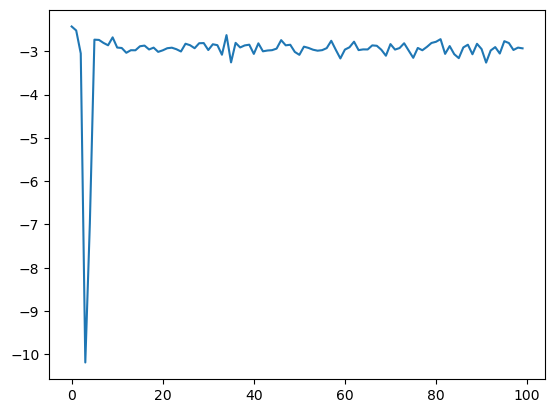

In [3]:
plt.plot(lossvalues100)
plt.show()

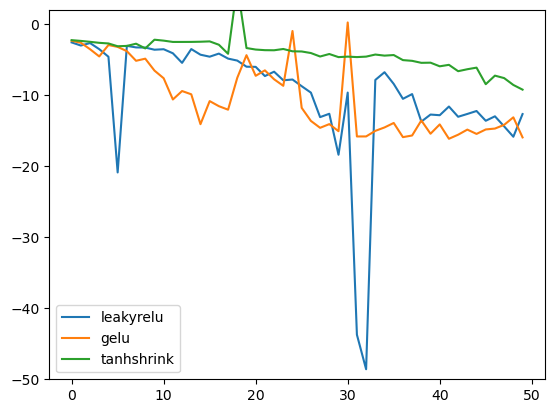

In [376]:

plt.plot(lossvalues, label = "leakyrelu")
plt.plot(lossvaluesgelu, label = "gelu")
plt.plot(lossvaluestanh, label = "tanhshrink")
plt.legend()
plt.ylim(-50 - 0.01, 2 + 0.01)
plt.show()

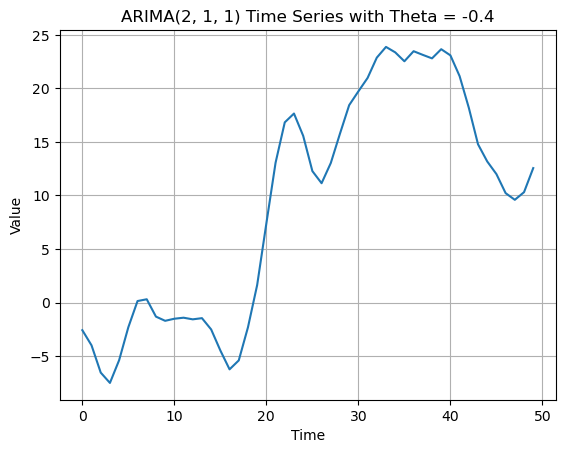

In [377]:
#2,1,1
theta = -0.4
ar_params = np.array([0.8, theta]) #damped ocsillations
ma_params = np.array([0.5])  #noise 

ar = np.r_[1, -ar_params]
ma = np.r_[1, ma_params]
np.random.seed(2135158)
n = 50
arma_data = sm.tsa.arma_generate_sample(ar, ma, nsample=n, burnin=20)
data = np.cumsum(arma_data) #differencing

plt.plot(data)
plt.title(f'ARIMA(2, 1, 1) Time Series with Theta = {theta}')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()

timen = 61


In [378]:
ar_base = 0.8 
ma_param = 0.5 
ensemble_size = 7
burnin = 20

theta_candidates = np.linspace(-1, 0, timen)

ensemble_forecasts = {}
for theta in theta_candidates:
    forecasts = []
    ar_params = np.array([ar_base, theta])
    
    for _ in range(ensemble_size):
        ar = np.r_[1, -ar_params]
        ma = np.r_[1, ma_param]
        
        arma_data = sm.tsa.arma_generate_sample(ar, ma, nsample=n, burnin=burnin)
        
        arima_data = np.cumsum(arma_data)
        
        forecasts.append(arima_data)
    
    ensemble_forecasts[theta] = np.stack(forecasts)

ensemble_forecasts

{-1.0: array([[ 4.03713852e+00,  2.50644627e+00, -3.50511485e+00,
         -6.89019443e+00, -4.16190056e+00,  1.00034638e+00,
          1.65329931e+00, -5.52852511e+00, -1.12031964e+01,
         -6.33466399e+00,  4.07747599e+00,  8.39372427e+00,
          3.74616698e+00, -2.87306668e+00, -2.10379820e+00,
          6.94232619e+00,  1.27041442e+01,  8.72611044e+00,
          1.49794181e+00, -1.81420931e-01,  6.05498329e+00,
          1.27464243e+01,  1.16880871e+01,  3.72820462e+00,
         -1.33022561e+00,  2.00183239e+00,  8.86652871e+00,
          1.01465072e+01,  2.31344937e+00, -5.72203406e+00,
         -5.46172743e+00,  1.77710996e+00,  6.95184361e+00,
          5.49706623e+00,  2.13781397e+00,  2.97979468e+00,
          5.43642757e+00,  4.99221516e+00,  1.53788241e+00,
         -2.48881272e+00, -3.32916928e+00, -5.71911869e-01,
          2.62269233e-01, -4.17778660e+00, -1.05542489e+01,
         -1.21141910e+01, -5.27994419e+00,  3.90722537e+00,
          5.05683716e+00, -3.58964

In [379]:
# static_kernel = sigkernel.RBFKernel(sigma=0.5) 
# signature_kernel = sigkernel.SigKernel(static_kernel, 1)

static_kernel = sigkernel.Linear_ID_Kernel()
dyadic_order = 2
signature_kernel = sigkernel.SigKernel(static_kernel, dyadic_order)


observed_tensor = torch.tensor(data, dtype=torch.double).unsqueeze(0).unsqueeze(-1)
mean = observed_tensor.mean()
std = observed_tensor.std()
observed_tensor = (observed_tensor -mean)/std
time = torch.from_numpy(np.linspace(0, 1, 50)).float()
time2 = time.view(1, 50, 1) 
time3 = time.view(1, 50, 1).expand(7, 50, 1) 
observed_tensortime = torch.cat((observed_tensor, time2), dim=2)

signature_scores = []
for theta in theta_candidates:
    print(theta)
    ensemble_tensor = torch.tensor(ensemble_forecasts[theta], dtype=torch.double).unsqueeze(-1)
    print(ensemble_tensor.shape)
    print(observed_tensortime.shape)
    ensemble_tensor = (ensemble_tensor -mean)/std
    ensemble_tensor = torch.cat((ensemble_tensor, time3), dim=2)
    score = signature_kernel.compute_scoring_rule(ensemble_tensor, observed_tensortime)
    signature_scores.append(score)


-1.0
torch.Size([7, 50, 1])
torch.Size([1, 50, 2])
-0.9833333333333333
torch.Size([7, 50, 1])
torch.Size([1, 50, 2])
-0.9666666666666667
torch.Size([7, 50, 1])
torch.Size([1, 50, 2])
-0.95
torch.Size([7, 50, 1])
torch.Size([1, 50, 2])
-0.9333333333333333
torch.Size([7, 50, 1])
torch.Size([1, 50, 2])
-0.9166666666666666
torch.Size([7, 50, 1])
torch.Size([1, 50, 2])
-0.9
torch.Size([7, 50, 1])
torch.Size([1, 50, 2])
-0.8833333333333333
torch.Size([7, 50, 1])
torch.Size([1, 50, 2])
-0.8666666666666667
torch.Size([7, 50, 1])
torch.Size([1, 50, 2])
-0.85
torch.Size([7, 50, 1])
torch.Size([1, 50, 2])
-0.8333333333333334
torch.Size([7, 50, 1])
torch.Size([1, 50, 2])
-0.8166666666666667
torch.Size([7, 50, 1])
torch.Size([1, 50, 2])
-0.8
torch.Size([7, 50, 1])
torch.Size([1, 50, 2])
-0.7833333333333333
torch.Size([7, 50, 1])
torch.Size([1, 50, 2])
-0.7666666666666666
torch.Size([7, 50, 1])
torch.Size([1, 50, 2])
-0.75
torch.Size([7, 50, 1])
torch.Size([1, 50, 2])
-0.7333333333333334
torch.Size(

In [380]:
signature_scores

[tensor(-3.9646, dtype=torch.float64),
 tensor(-5.9868, dtype=torch.float64),
 tensor(-6.2225, dtype=torch.float64),
 tensor(-2.1868, dtype=torch.float64),
 tensor(-4.0011, dtype=torch.float64),
 tensor(-0.2903, dtype=torch.float64),
 tensor(-1.2991, dtype=torch.float64),
 tensor(-1.7294, dtype=torch.float64),
 tensor(-2.3944, dtype=torch.float64),
 tensor(-1.6137, dtype=torch.float64),
 tensor(-4.4195, dtype=torch.float64),
 tensor(-6.9053, dtype=torch.float64),
 tensor(-6.6709, dtype=torch.float64),
 tensor(-1.8128, dtype=torch.float64),
 tensor(-5.6461, dtype=torch.float64),
 tensor(-4.8685, dtype=torch.float64),
 tensor(-3.6028, dtype=torch.float64),
 tensor(-6.9445, dtype=torch.float64),
 tensor(0.8154, dtype=torch.float64),
 tensor(-5.2986, dtype=torch.float64),
 tensor(-1.5449, dtype=torch.float64),
 tensor(-1.7225, dtype=torch.float64),
 tensor(-3.2515, dtype=torch.float64),
 tensor(-8.1765, dtype=torch.float64),
 tensor(-5.7655, dtype=torch.float64),
 tensor(-4.6117, dtype=tor

In [381]:
energyscores = [] 
for theta in theta_candidates:
    ensemble_tensor = torch.tensor(ensemble_forecasts[theta], dtype=torch.double).unsqueeze(-1)
    ensemble_tensor = (ensemble_tensor - mean) / std

    score = energy_score(ensemble_tensor, observed_tensor)
    energyscores.append(score.item())

In [382]:
energyscores

[8.188531622385376,
 6.421971854721871,
 5.648703190899675,
 8.39720658973613,
 6.62071590467424,
 9.438456515262777,
 8.305200240150768,
 8.791873240307327,
 7.3278730320273,
 8.980146355759475,
 6.500736565552771,
 5.737300992996191,
 6.026540961477603,
 8.276586129609942,
 7.50077922312645,
 6.392575893420721,
 8.092648664258565,
 5.094261920958209,
 10.24918893556013,
 7.377207400663464,
 8.692629933090526,
 6.735734734844835,
 7.440287974527396,
 5.460101581227217,
 6.578656253577195,
 6.21085904248867,
 4.863060225568129,
 6.642841736803842,
 5.280809227650711,
 9.231834571387958,
 6.281056888295124,
 6.260493948167251,
 8.216166537297692,
 8.979856824736174,
 5.68615611092821,
 10.262654811403825,
 6.543684749593298,
 8.756171227957612,
 6.885226146548964,
 4.192322922034276,
 7.069621673416731,
 6.800552989348477,
 4.908116922450735,
 5.419513025163269,
 10.173534919623119,
 12.76421681878581,
 5.955272312304921,
 6.458410719693691,
 7.483591551709775,
 10.642804763525971,
 6.1

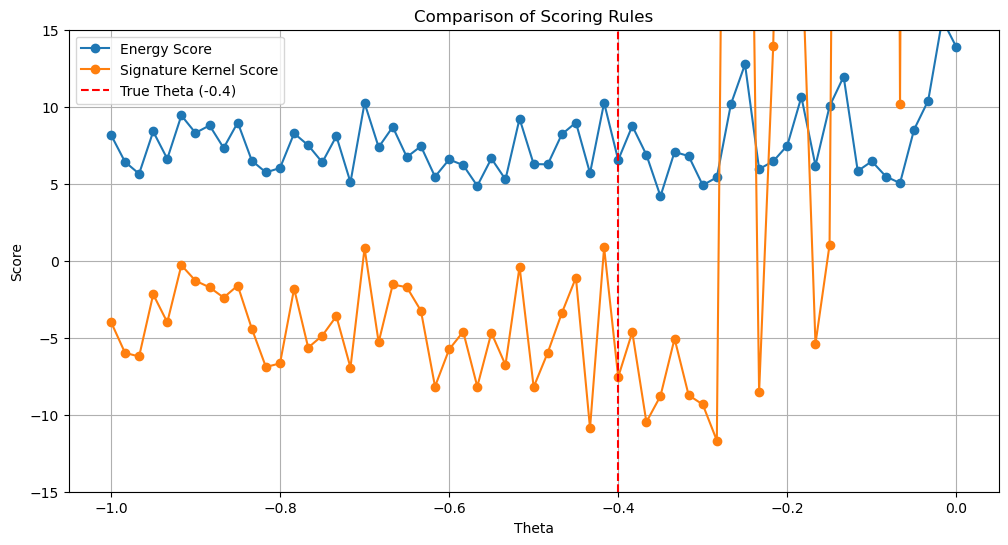

In [383]:
theta_candidates = np.linspace(-1, 0, timen)  

plt.figure(figsize=(12, 6))

plt.plot(theta_candidates, energyscores, label='Energy Score', marker='o')
plt.plot(theta_candidates, signature_scores, label='Signature Kernel Score', marker='o')

plt.axvline(x=-0.4, color='red', linestyle='--', label='True Theta (-0.4)')
plt.ylim(-15 - 0.01, 15 + 0.01)
plt.xlabel('Theta')
plt.ylabel('Score')
plt.title('Comparison of Scoring Rules')
plt.legend()
plt.grid(True)

plt.show()

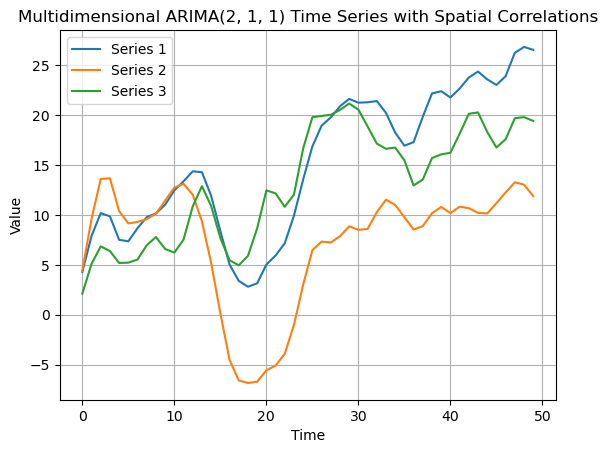

In [384]:
np.random.seed(2135158)

theta = -0.4
ar_params = np.array([0.8, theta])  
ma_params = np.array([0.5])         
n = 50                             
burnin = 20                       
num_series = 3                     
correlation_matrix = np.array([[1.0, 0.8, 0.5], [0.8, 1.0, 0.3], [0.5, 0.3, 1.0]])


mean = np.zeros(num_series)
cov = correlation_matrix  
noise = np.random.multivariate_normal(mean, cov, size=n + burnin)


multidimensional_data = []
for i in range(num_series):
    
    ar = np.r_[1, -ar_params]
    ma = np.r_[1, ma_params]
    arma_data = sm.tsa.arma_generate_sample(ar, ma, nsample=n, burnin=burnin, distrvs=lambda size: noise[:, i])
    
    arima_data = np.cumsum(arma_data)
    multidimensional_data.append(arima_data)

multidimensional_data = np.stack(multidimensional_data, axis=1)

for i in range(num_series):
    plt.plot(multidimensional_data[:, i], label=f'Series {i + 1}')
plt.title('Multidimensional ARIMA(2, 1, 1) Time Series with Spatial Correlations')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [385]:
ar_base = 0.8        
ma_param = 0.5      
ensemble_size = 7    
n = 50               
burnin = 20          
num_series = 3       
theta_candidates = np.linspace(-1, 0, 41) 

correlation_matrix = np.array([[1.0, 0.8, 0.5], [0.8, 1.0, 0.3], [0.5, 0.3, 1.0]])


ensemble_forecasts = {}

for theta in theta_candidates:
    forecasts = []  

    for _ in range(ensemble_size):
        mean = np.zeros(num_series)
        noise = np.random.multivariate_normal(mean, correlation_matrix, size=n + burnin)

        multidimensional_datalist = []
        for i in range(num_series):
            ar_params = np.array([ar_base, theta])
            ar = np.r_[1, -ar_params]
            ma = np.r_[1, ma_param]
            
            arma_data = sm.tsa.arma_generate_sample(ar, ma, nsample=n, burnin=burnin, distrvs=lambda size: noise[:, i])
            
            # Apply first-order differencing to get ARIMA(2, 1, 1)
            arima_data = np.cumsum(arma_data)
            multidimensional_datalist.append(arima_data)

        # Stack dimensions to form a 3D forecast path
        multidimensional_datalist = np.stack(multidimensional_datalist, axis=1)
        forecasts.append(multidimensional_datalist)

    # Store ensemble forecasts for this theta
    ensemble_forecasts[theta] = np.stack(forecasts)

# Check the shape of the generated forecasts
example_forecast = ensemble_forecasts[theta_candidates[0]]
print(f"Forecast shape for one theta: {example_forecast.shape}")


Forecast shape for one theta: (7, 50, 3)


In [386]:
ensemble_forecasts[theta_candidates[0]].shape

(7, 50, 3)

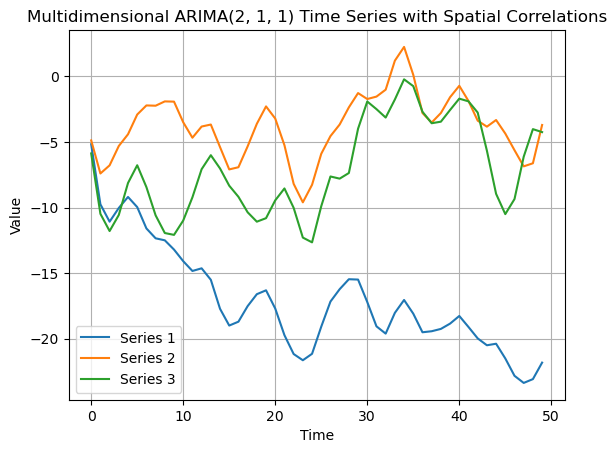

In [387]:
for i in range(num_series):
    plt.plot(ensemble_forecasts[theta_candidates[18]][0,:,i], label=f'Series {i + 1}')
plt.title('Multidimensional ARIMA(2, 1, 1) Time Series with Spatial Correlations')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [388]:
# Define the signature kernel with an RBF static kernel

# static_kernel = sigkernel.RBFKernel(sigma=0.5) 
# signature_kernel = sigkernel.SigKernel(static_kernel, 1)

static_kernel = sigkernel.RBFKernel(sigma=0.2)
dyadic_order = 2
signature_kernel = sigkernel.SigKernel(static_kernel, dyadic_order)

# Convert observed data to tensor
observed_tensor = torch.tensor(multidimensional_data, dtype=torch.double).unsqueeze(0)
mean = observed_tensor.mean()
std = observed_tensor.std()*np.sqrt(3)
observed_tensor = (observed_tensor -mean)/std

time = torch.from_numpy(np.linspace(0, 1, 50)).float()
time2 = time.view(1, 50, 1)
time3 = time.view(1, 50, 1).expand(7,50,1) 
observed_tensortime = torch.cat((observed_tensor, time2), dim=2)

# Compute Signature Kernel scores for each candidate parameter
signature_scores = []
for theta in theta_candidates:
    print(theta)
    ensemble_tensor = torch.tensor(ensemble_forecasts[theta], dtype=torch.double)
    ensemble_tensor = (ensemble_tensor -mean)/std
    ensemble_tensor = torch.cat((ensemble_tensor, time3), dim=2)

    print(ensemble_tensor.shape, observed_tensortime.shape)
    #print(ensemble_tensor)
    score = signature_kernel.compute_scoring_rule(ensemble_tensor, observed_tensortime)
    signature_scores.append(score)



-1.0
torch.Size([7, 50, 4]) torch.Size([1, 50, 4])
-0.975
torch.Size([7, 50, 4]) torch.Size([1, 50, 4])
-0.95
torch.Size([7, 50, 4]) torch.Size([1, 50, 4])
-0.925
torch.Size([7, 50, 4]) torch.Size([1, 50, 4])
-0.9
torch.Size([7, 50, 4]) torch.Size([1, 50, 4])
-0.875
torch.Size([7, 50, 4]) torch.Size([1, 50, 4])
-0.85
torch.Size([7, 50, 4]) torch.Size([1, 50, 4])
-0.825
torch.Size([7, 50, 4]) torch.Size([1, 50, 4])
-0.8
torch.Size([7, 50, 4]) torch.Size([1, 50, 4])
-0.775
torch.Size([7, 50, 4]) torch.Size([1, 50, 4])
-0.75
torch.Size([7, 50, 4]) torch.Size([1, 50, 4])
-0.725
torch.Size([7, 50, 4]) torch.Size([1, 50, 4])
-0.7
torch.Size([7, 50, 4]) torch.Size([1, 50, 4])
-0.675
torch.Size([7, 50, 4]) torch.Size([1, 50, 4])
-0.6499999999999999
torch.Size([7, 50, 4]) torch.Size([1, 50, 4])
-0.625
torch.Size([7, 50, 4]) torch.Size([1, 50, 4])
-0.6
torch.Size([7, 50, 4]) torch.Size([1, 50, 4])
-0.575
torch.Size([7, 50, 4]) torch.Size([1, 50, 4])
-0.55
torch.Size([7, 50, 4]) torch.Size([1, 50

In [389]:
energyscores = [] 
for theta in theta_candidates:
    ensemble_tensor = torch.tensor(ensemble_forecasts[theta], dtype=torch.double)
    ensemble_tensor = (ensemble_tensor - mean) / std
    # Observation tensor should match the shape (1, sequence_length, feature_dim)
    score = energy_score(ensemble_tensor, observed_tensor)
    energyscores.append(score.item())

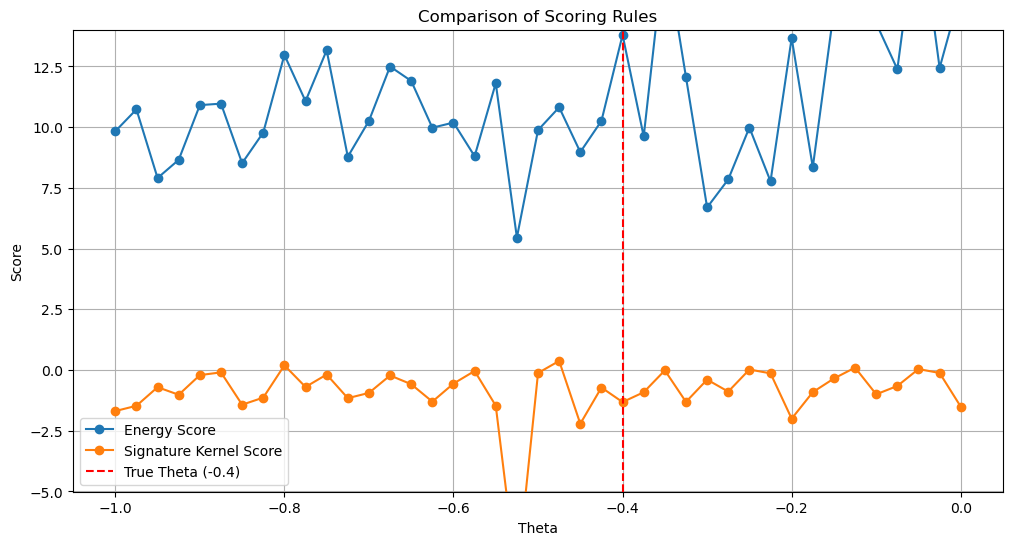

In [391]:
theta_candidates = np.linspace(-1, 0, 41)  # Candidate theta values

plt.figure(figsize=(12, 6))
# Plot the scores
plt.plot(theta_candidates, energyscores, label='Energy Score', marker='o')
plt.plot(theta_candidates, signature_scores, label='Signature Kernel Score', marker='o')

# Add vertical line at theta = -0.4
plt.axvline(x=-0.4, color='red', linestyle='--', label='True Theta (-0.4)')
# Add labels and title
plt.ylim(-5 - 0.01, 14 + 0.01)
plt.xlabel('Theta')
plt.ylabel('Score')
plt.title('Comparison of Scoring Rules')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
energy_scores = []

for theta in theta_candidates:
    print(theta)
    ensemble_tensor = torch.tensor(ensemble_forecasts[theta], dtype=torch.double).unsqueeze(-1)
    print(ensemble_tensor.shape)
    ensemble_tensor = (ensemble_tensor -mean)/std
    score = signature_kernel.compute_scoring_rule(ensemble_tensor, observed_tensor)
    signature_scores.append(score)

In [117]:
# Define candidate parameters around the true value
theta_candidates = np.linspace(0, -1, 50)
theta_candidates
# Generate ensemble forecasts for each candidate parameter
ensemble_size = 7
ensemble_forecasts = {}

for theta in theta_candidates:
    ar = np.r_[1, -np.array([theta])]
    forecasts = []
    
    for _ in range(ensemble_size):
        forecast = sm.tsa.arma_generate_sample(ar, ma, nsample=n)
        forecasts.append(forecast)
    
    ensemble_forecasts[theta] = np.stack(forecasts)

#For each theta we have 7 forecasts


In [66]:
# Define the signature kernel with an RBF static kernel

# static_kernel = sigkernel.RBFKernel(sigma=0.5) 
# signature_kernel = sigkernel.SigKernel(static_kernel, 1)

static_kernel = sigkernel.Linear_ID_Kernel()
dyadic_order = 2
signature_kernel = sigkernel.SigKernel(static_kernel, dyadic_order)

# Convert observed data to tensor
observed_tensor = torch.tensor(data, dtype=torch.double).unsqueeze(0).unsqueeze(-1)
mean = observed_tensor.mean()
std = observed_tensor.std()
observed_tensor = (observed_tensor -mean)/std

# Compute Signature Kernel scores for each candidate parameter
signature_scores = []

for theta in theta_candidates:
    print(theta)
    ensemble_tensor = torch.tensor(ensemble_forecasts[theta], dtype=torch.double).unsqueeze(-1)
    print(ensemble_tensor.shape)
    ensemble_tensor = (ensemble_tensor -mean)/std
    score = signature_kernel.compute_scoring_rule(ensemble_tensor, observed_tensor)
    signature_scores.append(score)


0.0
torch.Size([7, 50, 1])
0.02040816326530612
torch.Size([7, 50, 1])
0.04081632653061224
torch.Size([7, 50, 1])
0.061224489795918366
torch.Size([7, 50, 1])
0.08163265306122448
torch.Size([7, 50, 1])
0.1020408163265306
torch.Size([7, 50, 1])
0.12244897959183673
torch.Size([7, 50, 1])
0.14285714285714285
torch.Size([7, 50, 1])
0.16326530612244897
torch.Size([7, 50, 1])
0.18367346938775508
torch.Size([7, 50, 1])
0.2040816326530612
torch.Size([7, 50, 1])
0.22448979591836732
torch.Size([7, 50, 1])
0.24489795918367346
torch.Size([7, 50, 1])
0.26530612244897955
torch.Size([7, 50, 1])
0.2857142857142857
torch.Size([7, 50, 1])
0.3061224489795918
torch.Size([7, 50, 1])
0.32653061224489793
torch.Size([7, 50, 1])
0.3469387755102041
torch.Size([7, 50, 1])
0.36734693877551017
torch.Size([7, 50, 1])
0.3877551020408163
torch.Size([7, 50, 1])
0.4081632653061224
torch.Size([7, 50, 1])
0.42857142857142855
torch.Size([7, 50, 1])
0.44897959183673464
torch.Size([7, 50, 1])
0.4693877551020408
torch.Size([7,

In [67]:
signature_scores

[tensor(-1.5734, dtype=torch.float64),
 tensor(-1.1649, dtype=torch.float64),
 tensor(-1.9999, dtype=torch.float64),
 tensor(-2.5265, dtype=torch.float64),
 tensor(-2.0006, dtype=torch.float64),
 tensor(-1.5518, dtype=torch.float64),
 tensor(-3.4544, dtype=torch.float64),
 tensor(-2.4340, dtype=torch.float64),
 tensor(-2.3345, dtype=torch.float64),
 tensor(-0.0639, dtype=torch.float64),
 tensor(-2.6954, dtype=torch.float64),
 tensor(-2.6085, dtype=torch.float64),
 tensor(-0.0694, dtype=torch.float64),
 tensor(-2.7905, dtype=torch.float64),
 tensor(-1.7089, dtype=torch.float64),
 tensor(-3.5562, dtype=torch.float64),
 tensor(-3.3234, dtype=torch.float64),
 tensor(-2.0137, dtype=torch.float64),
 tensor(-2.4271, dtype=torch.float64),
 tensor(-1.1969, dtype=torch.float64),
 tensor(-0.8686, dtype=torch.float64),
 tensor(-3.1764, dtype=torch.float64),
 tensor(-2.5717, dtype=torch.float64),
 tensor(-2.6058, dtype=torch.float64),
 tensor(-1.1278, dtype=torch.float64),
 tensor(-0.4121, dtype=to

In [69]:
energyscores = [] 
for theta in theta_candidates:
    ensemble_tensor = torch.tensor(ensemble_forecasts[theta], dtype=torch.double).unsqueeze(-1)
    ensemble_tensor = (ensemble_tensor - mean) / std

    # Observation tensor should match the shape (1, sequence_length, feature_dim)
    score = energy_score(ensemble_tensor, observed_tensor)
    energyscores.append(score.item())

In [70]:
energyscores

[5.990249965296179,
 5.796972046228956,
 5.658994330211643,
 5.856684128739737,
 6.387879904391091,
 5.398325064087567,
 6.234439654235148,
 5.84560136134766,
 5.966748643140539,
 5.759134236548366,
 5.605265036201544,
 6.533618797376844,
 6.1440613691525465,
 6.007478324510323,
 5.9830568604323755,
 6.069962856806173,
 5.69799884511508,
 5.360596167008226,
 5.186409258065402,
 5.855723925069359,
 6.020748866656635,
 5.742941593068228,
 5.574968723037146,
 5.663848928330152,
 5.5920797216637625,
 6.269943911661727,
 5.7418941563143875,
 5.856145902150152,
 5.861425414985696,
 6.124298112057045,
 5.803392028960635,
 5.815781287336628,
 5.233845465790619,
 5.862958922147631,
 5.997635444770542,
 6.2637323281648465,
 6.327710805071154,
 6.165371362454337,
 5.066884145878873,
 5.305412141419472,
 4.996441161427112,
 5.597312495270965,
 5.415813674401445,
 6.027670732002455,
 5.370913997902232,
 7.018584814824593,
 6.99306871823006,
 6.52425469423394,
 7.398372657881632,
 8.684806747986357]

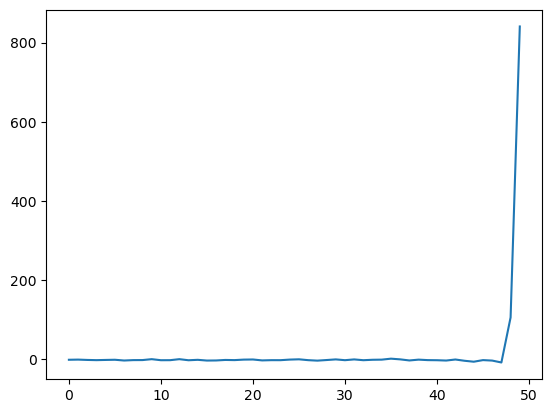

In [71]:
plt.plot(signature_scores)
plt.show()

In [25]:
theta_candidates = np.linspace(0, 2, 21)
theta_candidates  # Candidate values of theta around the true value

candidate_series = []
for theta in theta_candidates:
    ar = np.r_[1, -np.array([theta])]
    candidate_series.append(sm.tsa.arma_generate_sample(ar, ma, nsample=100))

array([-1.41537074, -0.42064532, -0.34271452, -0.80227727, -0.16128571,
        0.40405086,  1.8861859 ,  0.17457781,  0.25755039, -0.07444592,
       -1.91877122, -0.02651388,  0.06023021,  2.46324211, -0.19236096,
        0.30154734, -0.03471177, -1.16867804,  1.14282281,  0.75193303,
        0.79103195, -0.90938745,  1.40279431, -1.40185106,  0.58685709,
        2.19045563, -0.99053633, -0.56629773,  0.09965137, -0.50347565,
       -1.55066343,  0.06856297, -1.06230371,  0.47359243, -0.91942423,
        1.54993441, -0.78325329, -0.32206152,  0.81351722, -1.23086432,
        0.22745993,  1.30714275, -1.60748323,  0.18463386,  0.25988279,
        0.78182287, -1.23695071, -1.32045661,  0.52194157,  0.29698467,
        0.25049285,  0.34644821, -0.68002472,  0.2322537 ,  0.29307247,
       -0.71435142,  1.86577451,  0.47383292, -1.1913035 ,  0.65655361,
       -0.97468167,  0.7870846 ,  1.15859558, -0.82068232,  0.96337613,
        0.41278093,  0.82206016,  1.89679298, -0.24538812, -0.75

In [33]:

# Define the signature kernel with an RBF static kernel
static_kernel = sigkernel.Linear_ID_Kernel()
dyadic_order = 2
signature_kernel = sigkernel.SigKernel(static_kernel, dyadic_order)

# Convert data to tensors
observed_data = torch.tensor(data, dtype=torch.float32).unsqueeze(0).unsqueeze(-1)
mean = observed_data.mean()
std = observed_data.std()
observed_data = (observed_data - mean)/std
observed_data = observed_data.double()

signature_scores = []
for series in candidate_series:
    candidate_data = torch.tensor(series, dtype=torch.float32).unsqueeze(0).unsqueeze(-1)
    candidate_data = (candidate_data - mean)/std
    candidate_data = candidate_data.double()
    score = signature_kernel.compute_scoring_rule(candidate_data, observed_data)
    signature_scores.append(score.item())


In [37]:
signature_kernel.compute_scoring_rule(candidate_series[0], observed_data)

IndexError: tuple index out of range

In [35]:
signature_scores

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [34]:
from src.scoring_rules import EnergyScore

# Define the energy score
energy_score_fn = EnergyScore()

# Compute energy scores for each candidate series
energy_scores = []
for series in candidate_series:
    candidate_data = torch.tensor(series, dtype=torch.float32).unsqueeze(0).unsqueeze(-1)
    score = energy_score_fn.estimate_score_batch(candidate_data, observed_data)
    energy_scores.append(score.item())


ModuleNotFoundError: No module named 'src.scoring_rules'